# Resume NLP 

### Prediction of target jobs based on a resume

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud

## Load dataset

In [11]:
df_resume = pd.read_csv("/Users/aurelien/Downloads/ResumeDataSet.csv")
df_resume.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


# Data exploration

In [12]:
# Shape of dataset

df_resume.shape

(962, 2)

In [13]:
# Missing values

print(df_resume.isnull().sum())

Category    0
Resume      0
dtype: int64


In [14]:
# Category unique value

print("Category :\n", df_resume['Category'].unique())
print("\nThe are ",len(df_resume['Category'].value_counts()),"diffrents values" )

Category :
 ['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']

The are  25 diffrents values


<AxesSubplot:xlabel='Category', ylabel='count'>

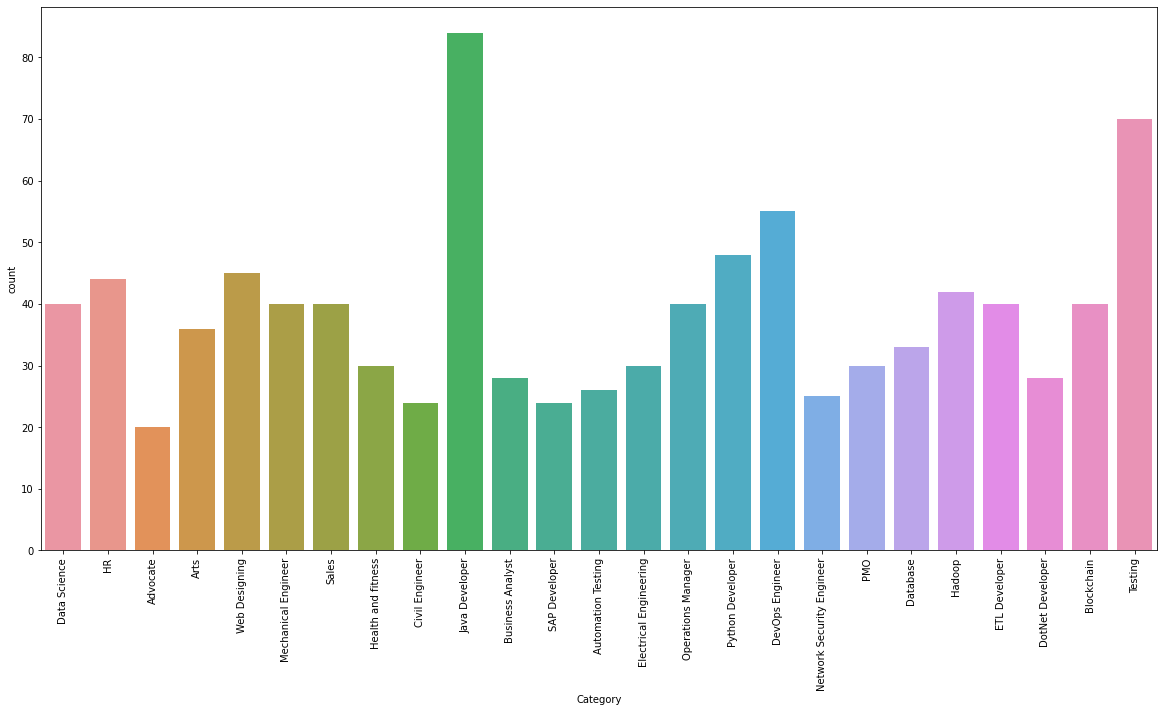

In [15]:
# Categroy repartition

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x = "Category", data = df_resume)

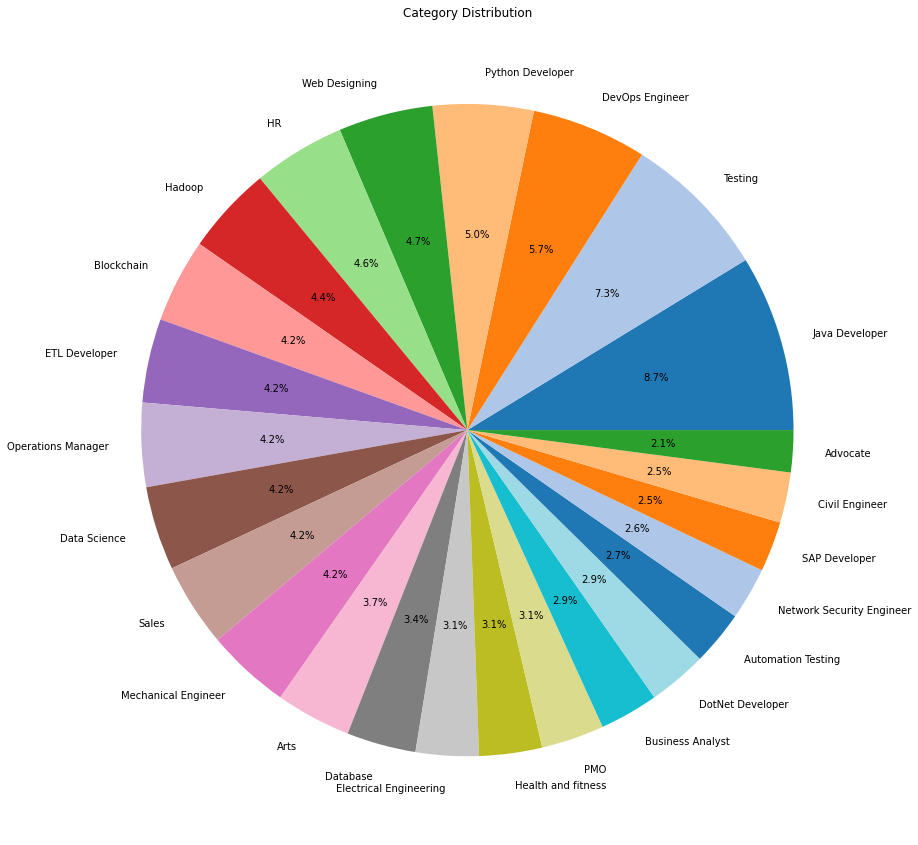

In [16]:
category = df_resume['Category'].value_counts().reset_index()
category

plt.figure(figsize=(15,15))
plt.pie(category['Category'], labels=category['index'],
        colors=sns.color_palette('tab20'), autopct='%1.1f%%')
plt.title('Category Distribution')
plt.show()

# Data Cleaning

### Remove stopwords, punctuation and tokenize text

In [17]:
stopwords_english = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

def process_text(text):
    text2 = re.sub('https:\/\/.*[\r\n]*','', text)
    text3 = re.sub(r'[^\w\s]','', text2)
    tokenizer = TweetTokenizer()
    text_mots = tokenizer.tokenize(text3)
    text_mots_lower = [word.lower() for word in text_mots]
    text_clean = [word for word in text_mots_lower if (word not in stopwords_english and len(word)>2)]
    return text_clean

In [18]:
df_resume["resume_clean"] = ""

In [19]:
df_resume['resume_clean'] = df_resume['Resume'].apply(lambda x:process_text(x))
df_resume.head()

,Category,Resume,resume_clean
0,Data Science,Skills * Programming Languages: Python (pandas...,"[skills, programming, languages, python, panda..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,"[education, details, may, 2013, may, 2017, uit..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","[areas, interest, deep, learning, control, sys..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,"[skills, python, sap, hana, tableau, sap, hana..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","[education, details, mca, ymcaust, faridabad, ..."


# Data Visualization

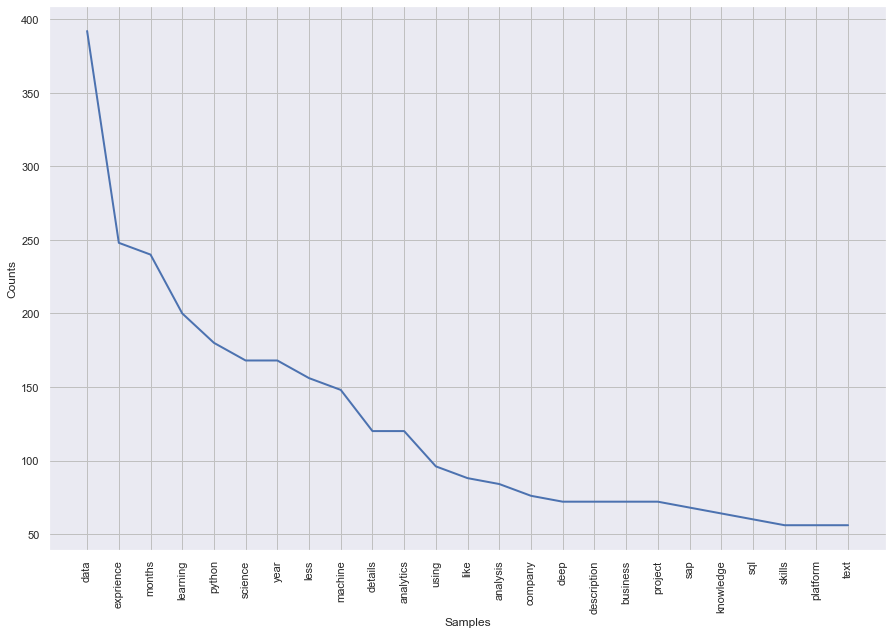

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
# Datascience words frequency

from nltk import FreqDist
l = list(df_resume[df_resume['Category'] == "Data Science"]['resume_clean'])
datascience_mots = [item for sublist in l for item in sublist]
rec_datascience_mots = FreqDist(datascience_mots)

sns.set()
ax = plt.figure(figsize = (15,10))
rec_datascience_mots.plot(25)

Text(0.5, 1.0, 'Wordcloud Data Science resume')

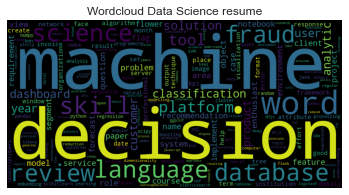

In [26]:
wordcloud = WordCloud(width = 1000, height = 500).generate(",".join(str(v) for v in rec_datascience_mots))  

plt.imshow(wordcloud)
plt.axis("off")
plt.title('Wordcloud Data Science resume')

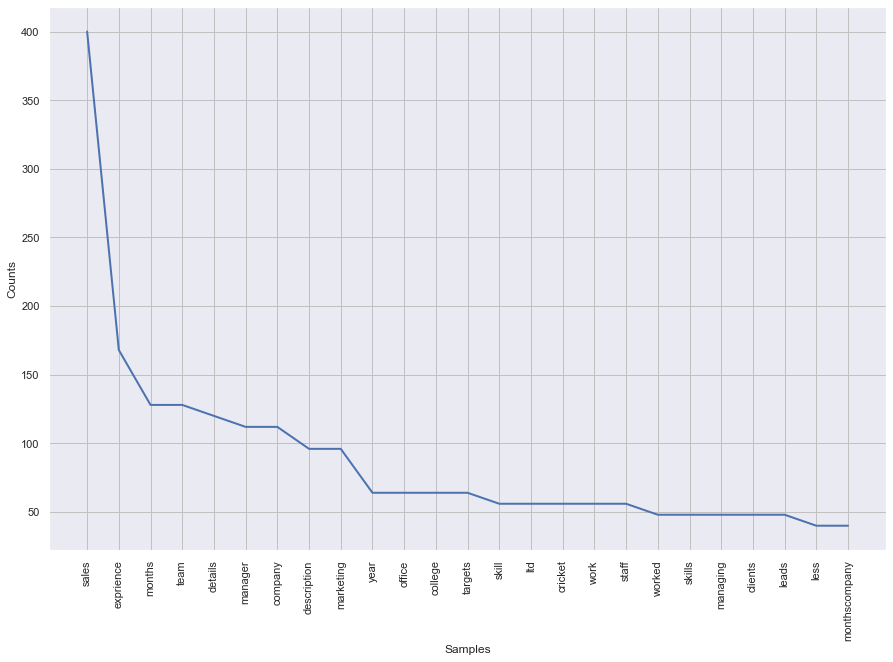

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
# Sales words frequency

from nltk import FreqDist
l = list(df_resume[df_resume['Category'] == "Sales"]['resume_clean'])
sales_mots = [item for sublist in l for item in sublist]
rec_sales_mots = FreqDist(sales_mots)

sns.set()
ax = plt.figure(figsize = (15,10))
rec_sales_mots.plot(25)

Text(0.5, 1.0, 'Wordcloud sales resume')

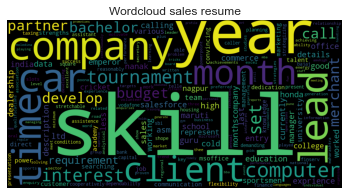

In [28]:
wordcloud = WordCloud(width = 1000, height = 500).generate(",".join(str(v) for v in rec_sales_mots))  

plt.imshow(wordcloud)
plt.axis("off")
plt.title('Wordcloud sales resume')

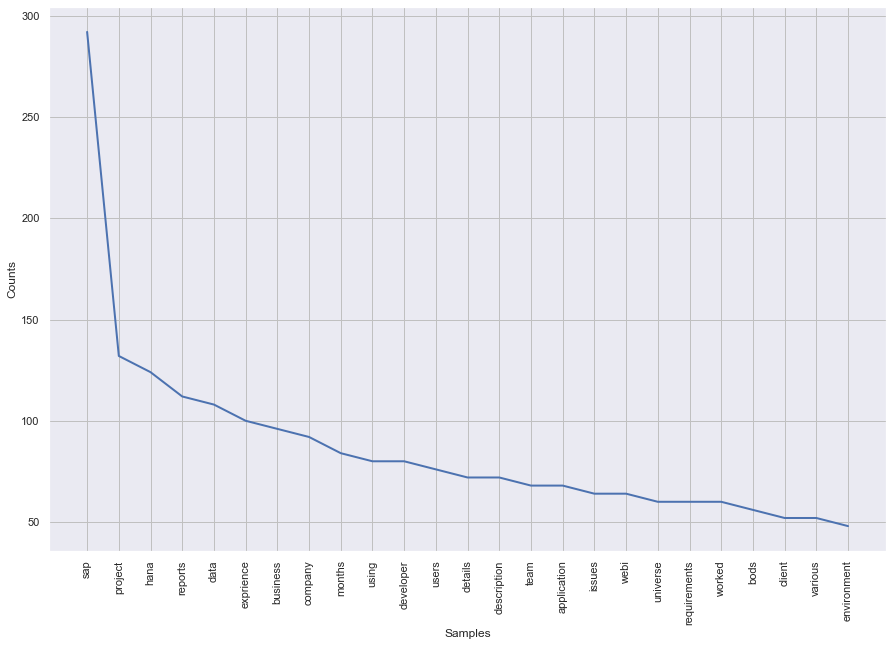

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [29]:
# SAP Developer words frequency

from nltk import FreqDist
l = list(df_resume[df_resume['Category'] == "SAP Developer"]['resume_clean'])
sap_mots = [item for sublist in l for item in sublist]
rec_sap_mots = FreqDist(sap_mots)

sns.set()
ax = plt.figure(figsize = (15,10))
rec_sap_mots.plot(25)

Text(0.5, 1.0, 'Wordcloud sap resume')

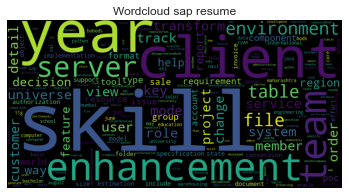

In [30]:
wordcloud = WordCloud(width = 1000, height = 500).generate(",".join(str(v) for v in rec_sap_mots))  

plt.imshow(wordcloud)
plt.axis("off")
plt.title('Wordcloud sap resume')

# Machine Learning

In [31]:
#Word vectorizer 
df_ml = df_resume
df_ml['resume_clean']

0      [skills, programming, languages, python, panda...
1      [education, details, may, 2013, may, 2017, uit...
2      [areas, interest, deep, learning, control, sys...
3      [skills, python, sap, hana, tableau, sap, hana...
4      [education, details, mca, ymcaust, faridabad, ...
                             ...                        
957    [computer, skills, proficient, office, word, b...
958    [willingness, accept, challenges, positive, th...
959    [personal, skills, quick, learner, eagerness, ...
960    [computer, skills, software, knowledge, mspowe...
961    [skill, set, windows, xp788110, database, mysq...
Name: resume_clean, Length: 962, dtype: object

In [32]:
df_ml.dtypes

Category        object
Resume          object
resume_clean    object
dtype: object

In [33]:
df_ml['resume_clean']=df_ml['resume_clean'].apply(lambda x:' '.join(x))  
df_ml

,Category,Resume,resume_clean
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 may 2017 uitrgpv da...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills python sap hana tableau sap hana sql sa...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient office word basic e...
958,Testing,â Willingness to accept the challenges. â ...,willingness accept challenges positive thinkin...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerness learn ...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge mspower poi...


In [34]:
#Train-Test 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

requiredTarget = df_ml['Category'].values
requiredText = df_ml['resume_clean'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=266)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

X_train, X_test, y_train, y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)

In [35]:
#Prediction Model 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [36]:
#Accuracy 

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('_________________________________________________________\n')
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.98
_________________________________________________________

Accuracy of KNeighbors Classifier on test set:     0.95


In [37]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
                           precision    recall  f1-score   support

                 Advocate       1.00      0.75      0.86         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       1.00      0.60      0.75         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       0.75      1.00      0.86         6
           Civil Engineer       1.00      0.60      0.75         5
             Data Science       0.73      1.00      0.84         8
                 Database       1.00      0.86      0.92         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       0.86      1.00      0.92         6
                       HR       1.

## WEB APP to try sample resume

Use of pickle to export the model <br>
Use of Flask to create a web app with python backend